# Linear Classifiers: Logistic Regression and GDA

## Overview of the logistic regression model

Recall the definition of the logistic function:

$$ g(z) = \frac{1}{1 + \exp ( - z )} $$

The logistic regression algorithm seeks to predict a binary label $y \in \{ 0 , 1 \}$ for a given data point $x \in \mathbb{R}^n$. Given a training set of $m$ labeled data points $(x^i , y^i)$, we let $X$ be the $m \times n$ matrix whose $i^{th}$ row is $x^i$ and $y \in \{0,1\}^m$ be the vectorized list of labels for this data. For a parameter $\theta \in \mathbb{R}^n$ to be determined, we suppose that the probability that $x$ will have the label $y = 1$ is given by the logistic function precomposed with a linear map in $x$, i.e. 

$$P( y = 1 | x ; \theta) = h(\theta,x) = g(x\cdot \theta)$$

where $\theta \cdot x$ is the usual Euclidean inner product. We will choose $\theta$ according to maximum likelihood estimation, which means we seek to maximize likelihood of theta, i.e. the conditional probability, 

$$L(\theta) = P(y | X ; \theta) = \Pi_i P(y^{(i)} | x^{(i)} ; \theta).$$

The equality here comes from the assumption that the labels of each observation $x^{(i)}$ are independent from one another. Since $y^{(i)}$ is Bernoulli with parameter $h(x^{(i)},\theta)$, setting $\ell(\theta) = \log L(\theta)$,

\begin{equation}
\begin{aligned}
\ell(\theta) =& \sum_i \log \left( h(x^{(i)},\theta)^{y^{(i)}}(1 - h(x^{(i)},\theta))^{1 - y^{(i)}} \right) \\
             =& \sum_i y^{(i)} \log h(x^{(i)},\theta) + (1 - y^{(i)}) \log (1 - h(x^{(i)},\theta))
\end{aligned}
\end{equation}


## (A)
#### Show that the negative average log likelihood for logistic regression is convex.

Recall that the negative log loss is 

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^m y^{(i)}\log h(x^{(i)},\theta) + (1 - y^{(i)})\log (1 - h(x^{(i)},\theta))$$

where $g(z) = (1 + e^{-z})^{-1}$ and $h(x,\theta) = g(x\cdot\theta)$. The sigmoid function $g$ satisfies $g' = g(1-g)$. Then we have

$$\partial_{\theta_j}\log h(x,\theta) = \frac{g'(x\cdot\theta)x_j}{h} = (1-h)x_j$$
$$ \partial_{\theta_j}\log (1 - h(x,\theta)) = -\frac{g'(x\cdot\theta)x_j}{1 - h} = -hx_j $$

Which means that 

$$\nabla J = -\frac{1}{m}\sum_{i=1}^m (y^{(i)} - h(x^{(i)},\theta))x^{(i)}$$

and the hessian is 

$$\nabla^2 J = \frac{1}{m}\sum_{i=1}^m d_\theta(h(x^{(i)},\theta) x^{(i)}) $$

$$\nabla^2 J = \frac{1}{m}\sum_{i=1}^m h(x^{(i)},\theta)(1-h(x^{(i)},\theta))x^{(i)}[x^{(i)}]^T$$

Since $1 - g = e^{-z}(1 + e^{-z})^{-1} > 0$, all terms in the sum are PSD.

## (B)
#### Train a logistic regression classifier in the file src/p01b_logreg.py. Write model's predictions to the place specified in the code.

In [2]:
from src import util
from src.p01b_logreg import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
## Load the training and validation set
x_train,y_train = util.load_dataset('./data/ds1_train.csv')
x_valid,y_valid = util.load_dataset('./data/ds1_valid.csv')

## Train a logreg model
logreg_model = LogisticRegression(max_iter=1e5)
logreg_model.fit(util.add_intercept(x_train),y_train)

## Write predictions to file.
y_preds = logreg_model.predict(x_valid)
np.savetxt('./output/p01b_pred_1.txt', X=y_preds,header='ds1_valid_logreg_preds')

## Overview of Gaussian Discriminant Analysis

### The hypotheses 

GDA is a generative algorithm, meaning for a binary classification problem $x \in \mathbb{R}^n$ and $y \in \{0,1 \}$, it seeks to learn $p(x | y)$ by pre-supposing that both $p( x | y = 1)$ and $p(x | y = 0)$ are have multivariate Gaussian distributions with possibly different means, but the same covariance matrix. Recall that this means that the conditional distributions have pdfs

$$p(x | y = i) \sim q(x,\mu_i,\Sigma) = \frac{1}{(2\pi)^{\frac{n}{2}} |\Sigma|^\frac{1}{2}}\exp \left(-\frac{1}{2} \langle \Sigma^{-1}(x-\mu_i) , (x-\mu_i) \rangle \right).$$

Here, $\mu_i \in \mathbb{R}^n$ and the *covariance matrix* $\Sigma$ is $n \times n$, symmetric, and positive definite. We also suppose that $y$ is Bernoulli with $p(y = 1) = \phi$. Hence the parameters we are free to tune are $\xi = (\mu_0,\mu_1, \Sigma, \phi)$.

Recall that given random variables $X_1 , \dots , X_n$ we define the *likelihood* of the observations $X_i = x_i$ is 
$L = p(x_1,\dots,x_n)$ where $p$ is the joint distribution of the $X_i$. (Side note -- this only makes sense when the joint density can be interpreted as a function.)


let $X^i$ be the $i^{th}$ observation of the data. In this case, since each data point is independent from one another, the random variables $Z_i = (X^i , y^i)$ which are valued in $\mathbb{R}^n \times \{0,1\}$, are independent. The density of each $Z_i$ is 

$$\zeta_i(x,j) = p(x | y = j)p(j) = \frac{1}{(2\pi)^{\frac{n}{2}} |\Sigma|^\frac{1}{2}}\exp \left(-\frac{1}{2} \langle \Sigma^{-1}(x-\mu_j) , (x-\mu_j) \rangle \right) \phi^{j}(1-\phi)^{1-j} \, dz$$

And since we are assuming independence of the $Z_i$, the joint likelihood is equal to $L(\theta) = \Pi_i \, \zeta_i(x^i,y^i)$ and the log likelihood is

$$\ell(\theta) = -\sum_i \frac{1}{2}\left( n\log 2\pi + \log \det \, \Sigma + \langle \Sigma^{-1}(x^i - \mu_{y^i}, x^i - \mu_{y^i} \rangle  \right) - y^i\log \phi - (1-y^i)\log(1-\phi)$$

after finding the parameters which maximize the joint likelihood, we predict $p(y | x)$ using **Bayes' rule:**

$$p(y | X = x) = \frac{p(x | Y = y) p_Y(y)}{p_X(x)} = \frac{p(x | Y = y) p_Y(y)}{p(x | Y = 0)p_Y(0) + p(x | Y = 1)p_Y(1)}$$

Here, $p_X$ and $p_Y$ are the distributions of $X$ and $Y$.

## (C)
#### Show that the GDA fit line is logistic

We are going to show that there exists $\theta \in \mathbb{R}^n$ and $\theta_0 \in \mathbb{R}$ so that if $\xi = (\mu_0,\mu_1,\Sigma,\phi)$ are the MLE parameters for GDA, then

$$p(y = 1 | x ; \, \xi) = g(\theta_0 + \theta \cdot x)$$

where $g(z)$ is the logistic function. To put this differently, we are trying to show that $f( p(y = 1 | x ; \, \xi) )$ is affine in $x$, where $f = g^{-1}$. Now if 

$$y = \frac{1}{1 + \exp (-z)}$$

then 

$$ z = \log \frac{y}{1 - y}$$

so we need to calculate $$ \Xi(x , \mu , \Sigma, \phi) = \log \left( \frac{p( y = 1 | X = x ; \xi)}{p(y = 0 | X = x ; \xi)}  \right) $$

Using Bayes' rule, we have

\begin{equation}
\begin{aligned}
\Xi &= \log \left( \frac{p(x | y = 1)p(y = 1)}{p(x | y = 0)p(y = 0)} \right) \\
    &= \log \left( \frac{p(x | y = 1)}{p(x | y = 0)} \right) + \log \frac{\phi}{1 - \phi}
\end{aligned}
\end{equation}

After writing out the Gaussian densities and taking logs we are left with one extra piece that goes into the $\theta_0$ term (the normalizing coefficients) and a term which is quadratic in $x$. However, degree 2 part of the expression is the same in both the numerator and the denominator, so it cancels out and we are left with an affine expression in $x$. It is straightforward to check that this affine function is

$$ \Sigma(\mu_1 - \mu_0) \cdot x + \langle \Sigma\mu_0, \mu_0 \rangle - \langle \Sigma \mu_1 , \mu_1 \rangle + \log \frac{\phi}{1-\phi}$$

## (D)
#### Finding the parameters which maximize the joint likelihood of the GDA model

We use the notation $\xi = (\phi,\mu_0,\mu_1, \Sigma)$ to denote the full set of parameters we are maximizing with respect to. As shown above, the log likelihood is 


$$\ell(\theta) = - \sum_i \frac{1}{2} \log \det\Sigma + \frac{1}{2}\Sigma^{-1}(x^i - \mu^i) \cdot (x^i - \mu^i) - y^i\log\phi - (1 - y^i)\log (1 - \phi) $$

The $\mu^i$ appearing in the equation above is $\mu^i = y^i\mu_1 + (1 - y^i)\mu_0$ and allows us to avoid splitting the sum according to the value of $y^i$. We have also ignored the constant term since our purpose is to differentiate the above formula. We now calculate where $\ell$ is critical with respect to the full set of parameters $\xi$.



### The $\phi$-critical equation.

The first part of the sum has no $\phi$ dependence, so differentiating we get

$$\partial_\phi \ell = \sum_i \frac{y^i}{\phi} + \frac{y^i- 1}{1 - \phi} = \sum_i \frac{y^i - \phi}{\phi(1-\phi)}$$

This is zero if and only if $\sum_i y^i = m \phi$, $m$ being the total number of data points. Hence we see that 

$$\phi = \frac{ |\{i : y^i = 1\}| }{m}$$

or in other words, $\phi$ is the empirical chance of observing $y = 1$.

### The $\mu$-critical equations.

The critical equations are, For $k \in \{0,1\}$:

$$ \nabla_{\mu_k}\ell = \sum_{\{i: y^i = k \}} \Sigma^{-1}(x^i - \mu_k) = 0$$

Since $\Sigma$ is non-singular, we must have

$$\frac{1}{|\{i : y^i = k\}|}\sum_{\{i: y^i = k\}} x^i = \mu_k$$

i.e. each mean is the empirical average.

### The $\Sigma$-critical equation.

We begin by noting that the space of positive definite symmetric matrices is an open subset of the vector space $\mathscr{S}_n(\mathbb{R})$ of all of $n \times n$ real symmetric matrices. This means the tangent space at $\Sigma$ can be identified with $\mathscr{S}_n(\mathbb{R})$. We will calculate $D\ell_{\Sigma}(X)$ for a given $X \in \mathscr{S}_n(\mathbb{R})$. First we state two important formulas.

Let $\iota : GL_n(\mathbb{R}) \to GL_n(\mathbb{R})$ be inversion, i.e. $\iota(A) = A^{-1}$. Then, for any $n \times n$ matrix $M$ (the tangent space to $GL_n(\mathbb{R})$),

$$D\iota_A(M) = -A^{-1}MA^{-1}.$$

Also, if $A$ positive definite and $F(A) = \log \det A$, then

$$DF_A(X) = \text{tr}\, (A^{-T}X).$$

If we write $v^i = x^i - \mu^i$ then a straightforward calculation shows that $\ell$ is critical at $\Sigma$ if and only if for every $X \in \mathscr{S}_n(\mathbb{R})$,

$$ \text{tr}\,(X\Sigma^{-1}) - \frac{1}{m}\sum_i \langle X\Sigma^{-1} v^i , \Sigma^{-1} v^i \rangle = 0.$$

Note that for any $B \in \mathscr{S}_n(\mathbb{R})$ and $y \in \mathbb{R}$, 

$$ \text{tr}\, (B yy^T) = B_ik (yy^T)_{ki} = B_{ik}y_ky_i = \langle By , y\rangle$$

which means the critical equation can be re-written as


$$\text{tr} \, (X\Sigma^{-1}) - \frac{1}{m} \sum_i \text{tr} \, (X \Sigma^{-1}v^i (v^i)^T \Sigma^{-1}) = 0$$

and by linearity of the trace, this means that 

$$X\left( \Sigma^{-1} - \frac{1}{m} \sum_i \Sigma^{-1}v^i (v^i)^T \Sigma^{-1}  \right)$$

is traceless for every $X \in \mathscr{S}_n(\mathbb{R})$. But because $ (A,B) = \text{tr}\,(AB)$ is an inner product on symmetric matrices, this means 

$$\Sigma^{-1} - \frac{1}{m} \sum_i \Sigma^{-1}v^i (v^i)^T \Sigma^{-1} = 0$$

or $$\Sigma = \frac{1}{m}\sum_i v^i (v^i)^T$$

## (E)
#### In p01e_gda.py, write code to fit the parameters $\phi,\mu_i,\Sigma$ to a training set. Use these parameters to calculate $\theta$ so that the gda decision boundary is given by $\theta \cdot x = 0$. Use this value of $\theta$ to make predictions on the validation set.

In [4]:
from src.p01e_gda import GDA

## Create and fit GDA model.
gda_model = GDA()
gda_model.fit(x_train,y_train)

## Make predictions on the validation set 
y_preds_gda = gda_model.predict(x_valid)
np.savetxt('./output/p01e_pred1.txt',X=y_preds_gda,header='ds1_valid_logreg_preds')


## (F)
#### Make a plot of the training set and the validation set with both the GDA and logreg decision boundaries pictured. Compare.

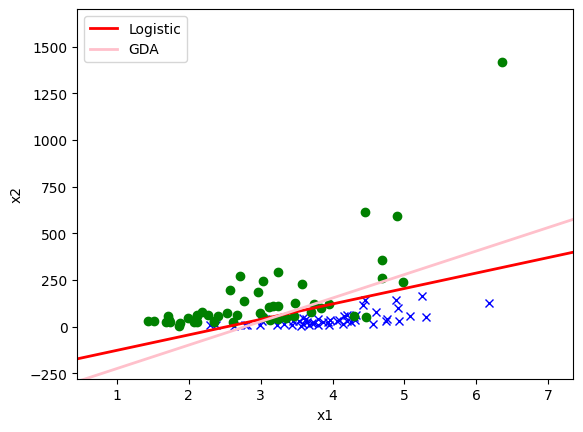

In [13]:
## For the ds1 validation set, make a plot of the data including both decision boundaries.

util.plot_compare(x=x_valid,
                  y=y_valid,
                  theta_1=logreg_model.theta,
                  theta_2=gda_model.theta,
                  name_1='Logistic',
                  name_2 = 'GDA')


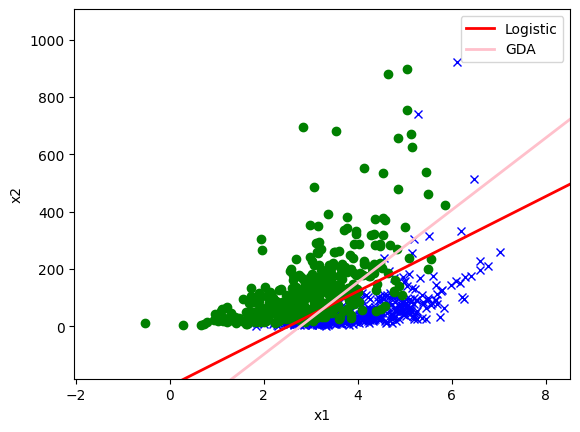

In [15]:
## Make the same plot for the training set

util.plot_compare(x=x_train,
                  y=y_train,
                  theta_1=logreg_model.theta,
                  theta_2=gda_model.theta,
                  name_1='Logistic',
                  name_2 = 'GDA')


## (G)
#### Repeat this procedure for ds2. On which dataset is there a performance difference? Why might this happen?

In [7]:
## Load datasets
x_train,y_train = util.load_dataset('./data/ds2_train.csv')
x_valid,y_valid = util.load_dataset('./data/ds2_valid.csv')

## Fit models
logreg_model_ds2 = LogisticRegression(max_iter=1e5)
gda_model_ds2 = GDA()

logreg_model_ds2.fit(util.add_intercept(x_train),y_train)
gda_model_ds2.fit(x_train,y_train)

## Make predictions
y_valid_preds_lr = logreg_model_ds2.predict(x_valid)
y_valid_preds_gda = gda_model_ds2.predict(x_valid)

## Save to file
np.savetxt('./output/p01e_pred2_logreg.txt',X=y_valid_preds_lr)
np.savetxt('./output/p01e_pred2_gda.txt',X=y_valid_preds_gda)

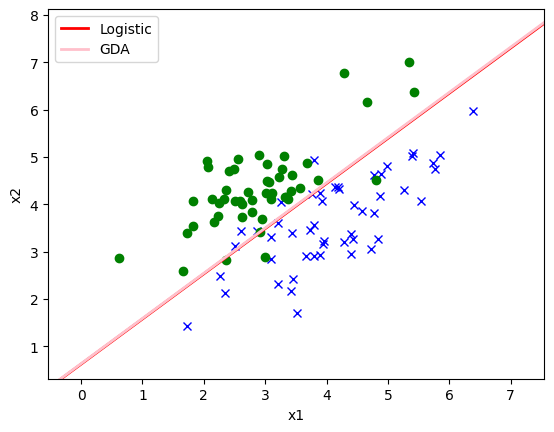

In [8]:
## Compare the plots of the performance on the ds2 validation set

util.plot_compare(x=x_valid,
                  y=y_valid,
                  theta_1=logreg_model_ds2.theta,
                  theta_2=gda_model_ds2.theta,
                  name_1='Logistic',
                  name_2 = 'GDA')

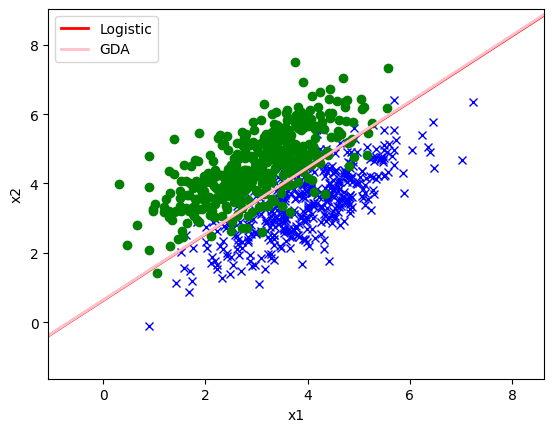

In [10]:
## Compare performance on the ds2 training set

util.plot_compare(x=x_train,
                  y=y_train,
                  theta_1=logreg_model_ds2.theta,
                  theta_2=gda_model_ds2.theta,
                  name_1='Logistic',
                  name_2 = 'GDA')

#### Remark:

GDA and logreg perform identically on ds2, but GDA is noticeably worse on ds1. This is probably because the true conditional distributions $p(x | y = j)$, $j = 0,1$ are not close to Gaussian, so the assumptions of the GDA model are less correct. In this case, logreg should give a better fit line.